In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.zeros((2,2))
while np.linalg.det(A) == 0:
    A = np.random.randint (1, 20, (5, 5))
    for i in range(5): A[i,i] = 20
b = np.random.randint (0, 20, 5)
E = 0.001
P = np.linalg.solve(A, b)
print(A, b, P)

[[20 13 14 18 16]
 [ 4 20 15 19 18]
 [11 18 20  8 15]
 [17 12  9 20  7]
 [ 5  2 15  7 20]] [18 11 15  2  7] [ 1.14356194  1.54353831 -2.26317966 -1.52959423  2.14249841]


In [4]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        s = s + (abs(A[i] - B[i]))**2

    return np.sqrt(s)

def Prod(A, x, i):
    N = len(x)
    s = 0
    
    for j in range(N):
        if j != i: s += A[i][j]*x[j]
    
    return s

def Simp(A, b, P, E):
    N = len(b)

    x, y = np.zeros(N), np.zeros(N)
    k = 0

    while Messure(x, P) > E and k < 1000:
        for i in range(N):
            y[i] = (b[i] - Prod(A, x, i))/A[i,i]
        x = y
        k+=1

    return (x, k)    

print(Simp(A, b, P, 0.001))

(array([ 1.14352471,  1.5433654 , -2.26253818, -1.52950729,  2.14201347]), 27)


In [5]:
def Prod_Zeydel(A, x, y, i):
    N = len(x)
    s = 0
    
    for j in range(N):
        if j < i: s += A[i][j]*y[j]
        elif j > i: s += A[i][j]*x[j]
    
    return s

def Gauss_Zeydel(A, b, P, E):
    N = len(b)

    x, y = np.zeros(N), np.zeros(N)
    k = 0

    while Messure(x, P) > E and k < 1000:
        for i in range(N):
            y[i] = (b[i] - Prod_Zeydel(A, x, y, i))/A[i,i]
        x = y
        k+=1


    return (x, k)    

print(Gauss_Zeydel(A, b, P, 0.001))

(array([ 1.14352267,  1.5433541 , -2.26250056, -1.52950183,  2.14198498]), 24)


In [6]:
def Gauss_Zeydel_with_argument(A, b, P, E, w):
    N = len(b)

    x, y = np.zeros(N), np.zeros(N)
    k = 0

    while Messure(x, P) > E and k < 1000:
        for i in range(N):
            y[i] = (1-w)*x[i] + w*(b[i] - Prod_Zeydel(A, x, y, i))/A[i,i]
        x = y
        k+=1


    return (x, k)    

print(Gauss_Zeydel_with_argument(A, b, P, 0.001, 0.5))

(array([ 1.14357224,  1.54386629, -2.26384925, -1.5297556 ,  2.14303843]), 67)


C:\Users\ddigo\AppData\Local\Temp\ipykernel_10948\3290455842.py:5: RuntimeWarning: overflow encountered in double_scalars
  s = s + (abs(A[i] - B[i]))**2


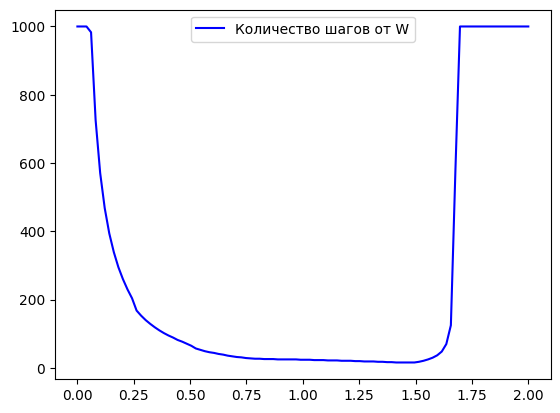

In [7]:
t = np.linspace(0, 2, 100)
Z = np.zeros(len(t))

for i in range(len(t)):
    temp = Gauss_Zeydel_with_argument(A, b, P, 0.001, t[i])[1]
    try:
        Z[i] = temp
    except TypeError or RuntimeWarning:
        Z[i] = 1000

plt.plot(t, Z, color = 'blue', label = 'Количество шагов от W')
plt.legend()
plt.show()